In [1]:
import pandas as pd 
from sklearn.metrics import cohen_kappa_score
import numpy as np

## Importing the dataset needed for the analysis

In [1]:
## Import the data as required

## Formatting the ML dataset to work with the dataset.

In [3]:
ml_anon = pd.read_csv("## Import the datasets for each reviewer here.")

In [4]:
ml_anon.drop("Unnamed: 0", inplace=True, axis=1)

In [5]:
np.where(ml_anon.prediction_score == 1, "T", "F")

array(['F', 'F', 'F', ..., 'F', 'F', 'F'], dtype='<U1')

In [6]:
ml_anon["Is Sybil? (T or F)"] = np.where(ml_anon.prediction_score == 1, "T", "F")

In [7]:
ml_anon.columns

Index(['handle', 'prediction_score', 'prediction_confidence', 'quant_1',
       'quant_2', 'quant_3', 'quant_4', 'quant_5', 'quant_6', 'quant_7',
       'Is Sybil? (T or F)'],
      dtype='object')

In [9]:
names = [adebola, am, ann, anuj, elbeth, bfa, gold, bob, lkh, waka, trice, proof, emmanuel, fizzy, dog, flob, emma_j, greg,
        grey, stel, jshua, kish, kylin, z4yr, hound, mount, nadalie, richard, ogunjo, am2, robot, ann2, steeges, vik, socal,
        wolfman, zer, ml_anon ]

In [10]:
# Making a loop through all the datasheet of human evaluation,
# then renaming the Unnamed: 0 column to handle so that all the data used for the analysis have a column in common
for i in names:
    i.rename({"Unnamed: 0": "handle"}, axis=1, inplace=True)

In [11]:
def namestr(obj, namespace):
    """
    This function makes it posible to retrive the name of a variable (stored_data).
    """
    
    return [name for name in namespace if namespace[name] is obj]


In [12]:
def create_table(data1, data2):
    
    """
    This function creates a table for any two reviewer that share common handles reviewed.
    """
    
    df = pd.DataFrame()
    
    df = data1.merge(data2, on="handle", suffixes=(namestr(data1, globals())[0], namestr(data2, globals())[0]))
    
    df.dropna(subset=["Is Sybil? (T or F)" +namestr(data1, globals())[0], "Is Sybil? (T or F)" +namestr(data2, globals())[0]],
             inplace=True)
    
    return df

In [13]:
## This cell loops through 

def find_common_handles(name):
    
    """
    This function loops through the list of reviewers data and returns the each reviewer and number of handles they have in 
    common with the "name" given.
    """
    freq=[]
    for i in names:
        freq.append([namestr(i, globals())[0], create_table(name, i).shape[0]])
    return freq

In [14]:
def total_agreement(data, name1, name2):
    
    """
    This function calculates the total agreement of between any two reviewer.
    Ranges from 0 to 1.
    A score of 1 denotes they made the same call on all handles the reviewed in common.
    A score of 0 denotes they made the different call on all handles the reviewed in common.
    """
    
    lenght = data.shape[0]
    
    count = data.loc[data["Is Sybil? (T or F)" + name1] == data["Is Sybil? (T or F)" + name2]].shape[0]
    
    agreements = count
    
    return agreements/lenght
    

In [15]:
def total_disagreement(data, name1, name2):
    
    """
    This function calculates the total disagreement of between any two reviewer.
    Ranges from 0 to 1.
    A score of 0 denotes they made the same call on all handles the reviewed in common.
    A score of 1 denotes they made the different call on all handles the reviewed in common.
    """
    
    lenght = data.shape[0]
    
    count = data.loc[data["Is Sybil? (T or F)" + name1] != data["Is Sybil? (T or F)" + name2]].shape[0]
    
    disagreements = count
    
    return disagreements/lenght

In [324]:
## This is an illustration of the functions 
disagreement= total_disagreement(fiz_ric, "fizzy", "richard")
print(f"The total disagreement between Fizzy and Richard is: {disagreement}" )
agreement = total_agreement(fiz_ric, "fizzy", "richard")
print(f"The total agreement between Fizzy and Richard is: {agreement}\n")

disagreement= total_disagreement(fiz_elb, "fizzy", "elbeth")
print(f"The total disagreement between Fizzy and Elbeth is: {disagreement}" )
agreement = total_agreement(fiz_elb, "fizzy", "elbeth")
print(f"The total agreement between Fizzy and Elbeth is: {agreement}")

The total disagreement between Fizzy and Richard is: 0.5
The total agreement between Fizzy and Richard is: 0.5

The total disagreement between Fizzy and Elbeth is: 1.0
The total agreement between Fizzy and Elbeth is: 0.0


## Fizzy Interreliability 

In [27]:
find_common_handles(fizzy)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 4],
 ['bfa', 2],
 ['gold', 3],
 ['bob', 2],
 ['lkh', 1],
 ['waka', 0],
 ['trice', 1],
 ['proof', 0],
 ['emmanuel', 0],
 ['fizzy', 60],
 ['dog', 0],
 ['flob', 1],
 ['emma_j', 0],
 ['greg', 1],
 ['grey', 1],
 ['stel', 2],
 ['jshua', 0],
 ['kish', 0],
 ['kylin', 0],
 ['z4yr', 1],
 ['hound', 2],
 ['mount', 2],
 ['nadalie', 1],
 ['richard', 4],
 ['ogunjo', 0],
 ['am2', 1],
 ['robot', 0],
 ['ann2', 1],
 ['steeges', 1],
 ['vik', 1],
 ['socal', 3],
 ['wolfman', 1],
 ['zer', 2],
 ['ml_anon', 48]]

In [24]:
def cohen(data1, data2):
    
    """
    This function creates the table and calculate the Cohen_kappa score at once.
    """
    
    data = create_table(data1, data2)
    
    return cohen_kappa_score(data["Is Sybil? (T or F)" + namestr(data1,globals())[0]],
                            data["Is Sybil? (T or F)" +namestr(data2, globals())[0]])

In [28]:
[cohen(fizzy, richard), cohen(fizzy, elbeth), cohen(fizzy, gold), cohen(fizzy, socal), cohen(fizzy, ml_anon)]

[-0.33333333333333326, 0.0, 0.3999999999999999, -0.5, -0.09090909090909083]

In [330]:
## creating tables from those with atleast 3 common columns

fiz_ric = create_table(fizzy, richard)
fiz_elb = create_table(fizzy, elbeth)
fiz_gold = create_table(fizzy, gold)
## You can create a dataset like this for the others.
fiz_ml = create_table(fizzy, ml_anon)

In [21]:
"Is sybil" + namestr(fizzy, globals())[0]

'Is sybilfizzy'

In [331]:
total_agreement(fiz_ric, "fizzy", "richard"), total_agreement(fiz_elb, "fizzy", "elbeth"), total_agreement(fiz_gold, "fizzy", "gold"), total_agreement(fiz_ml, "fizzy", "ml_anon")

(0.5, 0.0, 0.6666666666666666, 0.6666666666666666)

In [256]:
## Calculating the cohen kappa score.
## You can copy and paste this code and edit it to have the tables you created for each reviewer and the names as in this cell
## Places to edit is shown below:

#                  here                       here     here                       here 
[cohen_kappa_score(fiz_ric["Is Sybil? (T or F)fizzy"], fiz_ric["Is Sybil? (T or F)richard"]),
 
cohen_kappa_score(fiz_elb["Is Sybil? (T or F)fizzy"], fiz_elb["Is Sybil? (T or F)elbeth"]),
 
cohen_kappa_score(fiz_gold["Is Sybil? (T or F)fizzy"], fiz_gold["Is Sybil? (T or F)gold"]),
 
## This calculates the cohen kappa score of the ml_anon and the reviewer.
cohen_kappa_score(fiz__ml["Is Sybil? (T or F)fizzy"], fiz__ml["Is Sybil? (T or F)ml_anon"])]

[-0.33333333333333326, 0.0, 0.3999999999999999, -0.09090909090909083]

In [257]:
df = pd.DataFrame()
df["Reviewers"] = ["Richard", "Elbeth", "Gold", "ML Anon"]
df["Correlations"] = [-0.33333333333333326, 0.0, 0.3999999999999999, -0.09090909090909083]
df

,Reviewers,Correlations
0,Richard,-0.333333
1,Elbeth,0.000000
2,Gold,0.400000
3,ML Anon,-0.090909


In [258]:
import plotly.express as px

In [259]:
px.bar(data_frame=df, 
      x= "Reviewers",
      y="Correlations",
      color="Correlations",
       template="presentation",
      color_continuous_scale=px.colors.diverging.Spectral,
       title="Cohen-kappa score of Fizzy with other reviewers",
      #width=500
      )

## Elbeth

In [95]:
find_common_handles(elbeth)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 60],
 ['bfa', 3],
 ['gold', 1],
 ['bob', 0],
 ['lkh', 2],
 ['waka', 2],
 ['trice', 5],
 ['proof', 2],
 ['emmanuel', 0],
 ['fizzy', 4],
 ['dog', 1],
 ['flob', 2],
 ['emma_j', 1],
 ['greg', 1],
 ['grey', 1],
 ['stel', 0],
 ['jshua', 1],
 ['kish', 0],
 ['kylin', 2],
 ['z4yr', 3],
 ['hound', 2],
 ['mount', 4],
 ['nadalie', 0],
 ['richard', 3],
 ['ogunjo', 0],
 ['am2', 1],
 ['robot', 3],
 ['ann2', 2],
 ['steeges', 0],
 ['vik', 1],
 ['socal', 2],
 ['wolfman', 0],
 ['zer', 1],
 ['elbeth2', 2],
 ['bob2', 0],
 ['lkh2', 1],
 ['fizzy2', 0],
 ['trice2', 0],
 ['flob2', 0],
 ['greg2', 0],
 ['grey2', 0],
 ['stele2', 1],
 ['hound2', 2],
 ['richard2', 1],
 ['ogunjo2', 0],
 ['vik2', 0],
 ['wolfman2', 0]]

In [343]:
elb_rich = create_table(elbeth, richard)
elb_mount = create_table(elbeth, mount)
elb_z4yr = create_table(elbeth, z4yr)
elb_trice = create_table(elbeth, trice)
elb_fiz = create_table(elbeth, fizzy)
elb_ml = create_table(elbeth, ml_anon)

In [345]:
[total_agreement(elb_fiz, "elbeth", "fizzy"), total_agreement(elb_rich, "elbeth", "richard"),
 total_agreement(elb_mount, "elbeth", "mount"), total_agreement(elb_z4yr,"elbeth", "z4yr"),
 total_agreement(elb_trice,"elbeth", "trice"), total_agreement(elb_ml, "elbeth", "ml_anon")]

[0.0, 0.3333333333333333, 0.75, 0.6666666666666666, 0.6, 0.46511627906976744]

In [29]:
[cohen(elbeth, richard), cohen(elbeth, mount), cohen(elbeth, z4yr), cohen(elbeth, trice),
 cohen(elbeth, fizzy), cohen(elbeth, ml_anon)]

[0.0, 0.5, 0.3999999999999999, -0.25, 0.0, 0.1682085786375106]

In [102]:
[cohen_kappa_score(elb_rich["Is Sybil? (T or F)elbeth"], elb_rich["Is Sybil? (T or F)richard"]),
 
cohen_kappa_score(elb_mount["Is Sybil? (T or F)elbeth"], elb_mount["Is Sybil? (T or F)mount"]),
 
cohen_kappa_score(elb_z4yr["Is Sybil? (T or F)elbeth"], elb_z4yr["Is Sybil? (T or F)z4yr"]),
 
cohen_kappa_score(elb_trice["Is Sybil? (T or F)elbeth"], elb_trice["Is Sybil? (T or F)trice"]),
 
cohen_kappa_score(elb_fiz["Is Sybil? (T or F)elbeth"], elb_fiz["Is Sybil? (T or F)fizzy"]),]

[0.0, 0.5, 0.3999999999999999, -0.25, 0.0]

In [103]:
df = pd.DataFrame()
df["Reviewers"] = ["Richard", "Mount", "Z4yr", "Trice", "Fizzy"]
df["Correlations"] = [0.0, 0.5, 0.3999999999999999, -0.25, 0.0]
df

,Reviewers,Correlations
0,Richard,0.00
1,Mount,0.50
2,Z4yr,0.40
3,Trice,-0.25
4,Fizzy,0.00


In [104]:
px.bar(data_frame=df, 
      x= "Reviewers",
      y="Correlations",
      color="Correlations",
       template="presentation",
      color_continuous_scale=px.colors.diverging.Spectral,
       title="Cohen-kappa score of Elbeth with other reviewers",
      #width=500
      )

## BFA

In [105]:
find_common_handles(bfa)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 3],
 ['bfa', 60],
 ['gold', 3],
 ['bob', 1],
 ['lkh', 1],
 ['waka', 2],
 ['trice', 1],
 ['proof', 1],
 ['emmanuel', 1],
 ['fizzy', 2],
 ['dog', 5],
 ['flob', 2],
 ['emma_j', 1],
 ['greg', 0],
 ['grey', 1],
 ['stel', 0],
 ['jshua', 2],
 ['kish', 3],
 ['kylin', 0],
 ['z4yr', 0],
 ['hound', 0],
 ['mount', 2],
 ['nadalie', 1],
 ['richard', 2],
 ['ogunjo', 0],
 ['am2', 0],
 ['robot', 0],
 ['ann2', 1],
 ['steeges', 0],
 ['vik', 2],
 ['socal', 1],
 ['wolfman', 1],
 ['zer', 0],
 ['elbeth2', 2],
 ['bob2', 1],
 ['lkh2', 0],
 ['fizzy2', 3],
 ['trice2', 1],
 ['flob2', 0],
 ['greg2', 0],
 ['grey2', 1],
 ['stele2', 0],
 ['hound2', 1],
 ['richard2', 0],
 ['ogunjo2', 2],
 ['vik2', 0],
 ['wolfman2', 1]]

In [346]:
bfa_elbeth = create_table(bfa, elbeth)
bfa_gold = create_table(bfa, gold)
bfa_dog = create_table(bfa, dog)
bfa_kish = create_table(bfa, kish)
bfa_ml = create_table(bfa, ml_anon)

In [30]:
[cohen(bfa, elbeth), cohen(bfa, gold), cohen(bfa, dog), cohen(bfa, kish),
 cohen(bfa, ml_anon)]

[0.3999999999999999, 1.0, 0.5454545454545454, 0.0, 0.1104441776710684]

In [349]:
[total_agreement(bfa_elbeth, "bfa", "elbeth"), total_agreement(bfa_gold, "bfa", "gold"),
 total_agreement(bfa_dog, "bfa", "dog"), total_agreement(bfa_kish,"bfa", "kish"),
 total_agreement(bfa_ml, "bfa", "ml_anon")]

[0.6666666666666666, 1.0, 0.8, 0.6666666666666666, 0.5128205128205128]

In [111]:
[cohen_kappa_score(bfa_elbeth["Is Sybil? (T or F)bfa"], bfa_elbeth["Is Sybil? (T or F)elbeth"]),
 
cohen_kappa_score(bfa_gold["Is Sybil? (T or F)bfa"], bfa_gold["Is Sybil? (T or F)gold"]),
 
cohen_kappa_score(bfa_dog["Is Sybil? (T or F)bfa"], bfa_dog["Is Sybil? (T or F)dog"]),
 
cohen_kappa_score(bfa_kish["Is Sybil? (T or F)bfa"], bfa_kish["Is Sybil? (T or F)kish"])]

[0.3999999999999999, 1.0, 0.5454545454545454, 0.0]

In [112]:
df = pd.DataFrame()
df["Reviewers"] = ["Elbeth", "Gold", "Dogg", "Kish"]
df["Correlations"] = [0.3999999999999999, 1.0, 0.5454545454545454, 0.0]
df

,Reviewers,Correlations
0,Elbeth,0.400000
1,Gold,1.000000
2,Dogg,0.545455
3,Kish,0.000000


In [113]:
px.bar(data_frame=df, 
      x= "Reviewers",
      y="Correlations",
      color="Correlations",
       template="presentation",
      color_continuous_scale=px.colors.diverging.Spectral,
       title="Cohen-kappa score of BFA with other reviewers",
      #width=500
      )

## Gold

In [115]:
find_common_handles(gold)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 1],
 ['bfa', 3],
 ['gold', 60],
 ['bob', 0],
 ['lkh', 3],
 ['waka', 2],
 ['trice', 1],
 ['proof', 1],
 ['emmanuel', 1],
 ['fizzy', 3],
 ['dog', 1],
 ['flob', 1],
 ['emma_j', 1],
 ['greg', 0],
 ['grey', 0],
 ['stel', 1],
 ['jshua', 2],
 ['kish', 0],
 ['kylin', 2],
 ['z4yr', 4],
 ['hound', 0],
 ['mount', 1],
 ['nadalie', 2],
 ['richard', 1],
 ['ogunjo', 1],
 ['am2', 0],
 ['robot', 3],
 ['ann2', 2],
 ['steeges', 1],
 ['vik', 0],
 ['socal', 0],
 ['wolfman', 1],
 ['zer', 3],
 ['elbeth2', 1],
 ['bob2', 0],
 ['lkh2', 0],
 ['fizzy2', 2],
 ['trice2', 1],
 ['flob2', 1],
 ['greg2', 1],
 ['grey2', 0],
 ['stele2', 1],
 ['hound2', 1],
 ['richard2', 2],
 ['ogunjo2', 2],
 ['vik2', 2],
 ['wolfman2', 2]]

In [350]:
gold_bfa = create_table(gold, bfa)
gold_lkh = create_table(gold, lkh)
gold_fizzy = create_table(gold, fizzy)
gold_z4yr = create_table(gold, z4yr)
gold_robot = create_table(gold, robot)
gold_zer = create_table(gold, zer)
gold_ml = create_table(gold, ml_anon)

In [31]:
cohen(gold, ml_anon)

0.38983050847457634

In [352]:
[total_agreement(gold_bfa, "gold", "bfa"), total_agreement(gold_lkh, "gold", "lkh"),
 total_agreement(gold_fizzy, "gold", "fizzy"), total_agreement(gold_z4yr,"gold", "z4yr"),
 total_agreement(gold_robot,"gold", "robot"), total_agreement(gold_zer,"gold", "zer"),
 total_agreement(gold_ml, "gold", "ml_anon")]

[1.0,
 0.3333333333333333,
 0.6666666666666666,
 0.75,
 0.0,
 0.6666666666666666,
 0.7142857142857143]

In [124]:
[cohen_kappa_score(gold_bfa["Is Sybil? (T or F)gold"], gold_bfa["Is Sybil? (T or F)bfa"]),
 
cohen_kappa_score(gold_lkh["Is Sybil? (T or F)gold"], gold_lkh["Is Sybil? (T or F)lkh"]),
 
cohen_kappa_score(gold_fizzy["Is Sybil? (T or F)gold"], gold_fizzy["Is Sybil? (T or F)fizzy"]),
 
cohen_kappa_score(gold_z4yr["Is Sybil? (T or F)gold"], gold_z4yr["Is Sybil? (T or F)z4yr"]),
 
cohen_kappa_score(gold_zer["Is Sybil? (T or F)gold"], gold_zer["Is Sybil? (T or F)zer"])]

[1.0, 0.0, 0.3999999999999999, 0.5, 0.0]

In [125]:
df = pd.DataFrame()
df["Reviewers"] = ["BFA", "LKH", "Fizzy", "z4yr", "Zer"]
df["Correlations"] = [1.0, 0.0, 0.3999999999999999, 0.5, 0.0]
df

,Reviewers,Correlations
0,BFA,1.0
1,LKH,0.0
2,Fizzy,0.4
3,z4yr,0.5
4,Zer,0.0


In [126]:
px.bar(data_frame=df, 
      x= "Reviewers",
      y="Correlations",
      color="Correlations",
       template="presentation",
      color_continuous_scale=px.colors.diverging.Spectral,
       title="Cohen-kappa score of Gold with other reviewers",
      #width=500
      )

## BOB

In [127]:
find_common_handles(bob)

[['adebola', 1],
 ['am', 1],
 ['ann', 0],
 ['anuj', 2],
 ['elbeth', 0],
 ['bfa', 1],
 ['gold', 0],
 ['bob', 60],
 ['lkh', 3],
 ['waka', 4],
 ['trice', 0],
 ['proof', 1],
 ['emmanuel', 0],
 ['fizzy', 2],
 ['dog', 1],
 ['flob', 1],
 ['emma_j', 2],
 ['greg', 1],
 ['grey', 3],
 ['stel', 1],
 ['jshua', 0],
 ['kish', 2],
 ['kylin', 0],
 ['z4yr', 6],
 ['hound', 1],
 ['mount', 0],
 ['nadalie', 3],
 ['richard', 2],
 ['ogunjo', 1],
 ['am2', 2],
 ['robot', 2],
 ['ann2', 3],
 ['steeges', 1],
 ['vik', 1],
 ['socal', 0],
 ['wolfman', 1],
 ['zer', 1],
 ['elbeth2', 0],
 ['bob2', 0],
 ['lkh2', 2],
 ['fizzy2', 1],
 ['trice2', 1],
 ['flob2', 1],
 ['greg2', 2],
 ['grey2', 0],
 ['stele2', 1],
 ['hound2', 0],
 ['richard2', 0],
 ['ogunjo2', 0],
 ['vik2', 0],
 ['wolfman2', 0]]

In [353]:
bob_lkh = create_table(bob, lkh)
bob_waka = create_table(bob, waka)
bob_grey = create_table(bob, grey)
bob_z4yr = create_table(bob, z4yr)
bob_nadalie = create_table(bob, nadalie)
bob_ml = create_table(bob, ml_anon)

In [354]:
[total_agreement(bob_lkh, "bob", "lkh"), total_agreement(bob_waka, "bob", "waka"),
 total_agreement(bob_grey, "bob", "grey"), total_agreement(bob_z4yr,"bob", "z4yr"),
 total_agreement(bob_nadalie,"bob", "nadalie"), total_agreement(bob_ml, "bob", "ml_anon")]

[1.0,
 1.0,
 1.0,
 0.8333333333333334,
 1.0,
 0.6666666666666666,
 0.5777777777777777]

In [33]:
cohen(bob, waka), cohen(bob, ml_anon)

(1.0, 0.020618556701030855)

In [131]:
[cohen_kappa_score(bob_lkh["Is Sybil? (T or F)bob"], bob_lkh["Is Sybil? (T or F)lkh"]),
 
cohen_kappa_score(bob_grey["Is Sybil? (T or F)bob"], bob_grey["Is Sybil? (T or F)grey"]),
 
cohen_kappa_score(bob_z4yr["Is Sybil? (T or F)bob"], bob_z4yr["Is Sybil? (T or F)z4yr"]),
 
cohen_kappa_score(bob_nadalie["Is Sybil? (T or F)bob"], bob_nadalie["Is Sybil? (T or F)nadalie"]),

cohen_kappa_score(bob_ann2["Is Sybil? (T or F)bob"], bob_ann2["Is Sybil? (T or F)ann2"])]

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:658: RuntimeWarning:

invalid value encountered in true_divide



[1.0, nan, 0.0, 1.0, 0.3999999999999999]

In [134]:
df = pd.DataFrame()
df["Reviewers"] = ["LKH", "Grey", "Z4yr", "Nadalie", "Ann2"]
df["Correlations"] = [1.0, np.NaN, 0.0, 1.0, 0.3999999999999999]
df

,Reviewers,Correlations
0,LKH,1.0
1,Grey,NaN
2,Z4yr,0.0
3,Nadalie,1.0
4,Ann2,0.4


In [135]:
px.bar(data_frame=df, 
      x= "Reviewers",
      y="Correlations",
      color="Correlations",
       template="presentation",
      color_continuous_scale=px.colors.diverging.Spectral,
       title="Cohen-kappa score of Bob with other reviewers",
      #width=500
      )

## LKH

In [136]:
find_common_handles(lkh)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 2],
 ['bfa', 1],
 ['gold', 3],
 ['bob', 3],
 ['lkh', 60],
 ['waka', 2],
 ['trice', 2],
 ['proof', 2],
 ['emmanuel', 2],
 ['fizzy', 1],
 ['dog', 3],
 ['flob', 2],
 ['emma_j', 1],
 ['greg', 1],
 ['grey', 0],
 ['stel', 3],
 ['jshua', 1],
 ['kish', 1],
 ['kylin', 2],
 ['z4yr', 3],
 ['hound', 4],
 ['mount', 1],
 ['nadalie', 2],
 ['richard', 4],
 ['ogunjo', 3],
 ['am2', 1],
 ['robot', 1],
 ['ann2', 2],
 ['steeges', 1],
 ['vik', 1],
 ['socal', 2],
 ['wolfman', 2],
 ['zer', 0],
 ['elbeth2', 2],
 ['bob2', 0],
 ['lkh2', 3],
 ['fizzy2', 1],
 ['trice2', 0],
 ['flob2', 1],
 ['greg2', 0],
 ['grey2', 2],
 ['stele2', 1],
 ['hound2', 0],
 ['richard2', 1],
 ['ogunjo2', 0],
 ['vik2', 0],
 ['wolfman2', 2]]

In [355]:
lkh_gold = create_table(lkh, gold)
lkh_bob = create_table(lkh, bob)
lkh_dog = create_table(lkh, dog)
lkh_stel = create_table(lkh, stel)
lkh_z4yr = create_table(lkh, z4yr)
lkh_hound = create_table(lkh, hound)
lkh_ogunjo = create_table(lkh, ogunjo)
lkh_lkh2 = create_table(lkh, lkh2)
lkh_ml= create_table(lkh, ml_anon)

In [356]:
[total_agreement(lkh_gold, "lkh", "gold"), total_agreement(lkh_bob, "lkh", "bob"),
 total_agreement(lkh_dog, "lkh", "dog"), total_agreement(lkh_stel,"lkh", "stel"),
 total_agreement(lkh_z4yr,"lkh", "z4yr"), total_agreement(lkh_hound,"lkh", "hound"),
  total_agreement(lkh_ogunjo,"lkh", "ogunjo"), total_agreement(lkh_lkh2,"lkh", "lkh2"),
 total_agreement(lkh_ml, "lkh", "ml_anon")]

[0.3333333333333333,
 1.0,
 0.6666666666666666,
 0.0,
 0.3333333333333333,
 1.0,
 0.6666666666666666,
 1.0,
 0.6190476190476191]

In [138]:
[cohen_kappa_score(lkh_gold["Is Sybil? (T or F)lkh"], lkh_gold["Is Sybil? (T or F)gold"]),
 
cohen_kappa_score(lkh_bob["Is Sybil? (T or F)lkh"], lkh_bob["Is Sybil? (T or F)bob"]),
 
cohen_kappa_score(lkh_dog["Is Sybil? (T or F)lkh"], lkh_dog["Is Sybil? (T or F)dog"]),
 
cohen_kappa_score(lkh_stel["Is Sybil? (T or F)lkh"], lkh_stel["Is Sybil? (T or F)stel"]),

cohen_kappa_score(lkh_z4yr["Is Sybil? (T or F)lkh"], lkh_z4yr["Is Sybil? (T or F)z4yr"]),

cohen_kappa_score(lkh_hound["Is Sybil? (T or F)lkh"], lkh_hound["Is Sybil? (T or F)hound"]),
 
cohen_kappa_score(lkh_ogunjo["Is Sybil? (T or F)lkh"], lkh_ogunjo["Is Sybil? (T or F)ogunjo"])]

[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.3999999999999999]

In [34]:
cohen(lkh, ml_anon)

0.18347509113001215

In [142]:
df = pd.DataFrame()
df["Reviewers"] = ["Gold", "Bob", "Dogg", "Stelescuvlad", "Z4yr", "Hound", "Ogunjosam"]
df["Correlations"] = [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.3999999999999999]
df

,Reviewers,Correlations
0,Gold,0.0
1,Bob,1.0
2,Dogg,0.0
3,Stelescuvlad,0.0
4,Z4yr,0.0
5,Hound,1.0
6,Ogunjosam,0.4


In [143]:
px.bar(data_frame=df, 
      x= "Reviewers",
      y="Correlations",
      color="Correlations",
       template="presentation",
      color_continuous_scale=px.colors.diverging.Spectral,
       title="Cohen-kappa score of LKH with other reviewers",
      #width=500
      )

## Waka, Trice, Proof

In [169]:
find_common_handles(waka)

[['adebola', 0],
 ['am', 1],
 ['ann', 0],
 ['anuj', 0],
 ['elbeth', 0],
 ['bfa', 0],
 ['gold', 0],
 ['bob', 2],
 ['lkh', 0],
 ['waka', 30],
 ['trice', 0],
 ['proof', 1],
 ['emmanuel', 0],
 ['fizzy', 0],
 ['dog', 0],
 ['flob', 2],
 ['emma_j', 0],
 ['greg', 1],
 ['grey', 2],
 ['stel', 0],
 ['jshua', 0],
 ['kish', 0],
 ['kylin', 0],
 ['z4yr', 0],
 ['hound', 0],
 ['mount', 1],
 ['nadalie', 1],
 ['richard', 0],
 ['ogunjo', 2],
 ['am2', 2],
 ['robot', 1],
 ['ann2', 0],
 ['steeges', 2],
 ['vik', 0],
 ['socal', 2],
 ['wolfman', 0],
 ['zer', 0],
 ['elbeth2', 1],
 ['bob2', 0],
 ['lkh2', 0],
 ['fizzy2', 0],
 ['trice2', 0],
 ['flob2', 0],
 ['greg2', 0],
 ['grey2', 0],
 ['stele2', 1],
 ['hound2', 2],
 ['richard2', 0],
 ['ogunjo2', 1],
 ['vik2', 0],
 ['wolfman2', 0]]

In [357]:
waka_bob = create_table(waka, bob)
waka_flob = create_table(waka, flob)
waka_ogunjo = create_table(waka, ogunjo)
waka_steeges = create_table(waka, steeges)
waka_greg = create_table(waka, greg)
waka_grey = create_table(waka, grey)
waka_hound2 = create_table(waka, hound2)
waka_socal = create_table(waka, socal)
waka_am2 = create_table(waka, am2)
waka_ml =create_table(waka, ml_anon)

In [360]:
[total_agreement(waka_bob, "waka", "bob"),
 total_agreement(waka_flob, "waka", "flob"), total_agreement(waka_ogunjo,"waka", "ogunjo"),
 total_agreement(waka_steeges,"waka", "steeges"), total_agreement(waka_greg,"waka", "greg"),
 total_agreement(waka_grey,"waka", "grey"), total_agreement(waka_hound2,"waka", "hound2"),
 total_agreement(waka_socal,"waka", "socal"), total_agreement(waka_am2,"waka", "am2"),
 total_agreement(waka_ml, "waka", "ml_anon")]

[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.8235294117647058]

In [359]:
waka_trice

,handle,Is Sybil? (T or F)waka,"Confidence (low, so-so, high)waka",Noteswaka,gitcoin_urlwaka,github_urlwaka,Is Sybil? (T or F)trice,"Confidence (low, so-so, high)trice",Notestrice,gitcoin_urltrice,github_urltrice


In [177]:
[cohen_kappa_score(waka_bob["Is Sybil? (T or F)waka"], waka_bob["Is Sybil? (T or F)bob"]),
 
cohen_kappa_score(waka_flob["Is Sybil? (T or F)waka"], waka_flob["Is Sybil? (T or F)flob"]),
 
cohen_kappa_score(waka_ogunjo["Is Sybil? (T or F)waka"], waka_ogunjo["Is Sybil? (T or F)ogunjo"]),

cohen_kappa_score(waka_steeges["Is Sybil? (T or F)waka"], waka_steeges["Is Sybil? (T or F)steeges"]),

cohen_kappa_score(waka_greg["Is Sybil? (T or F)waka"], waka_greg["Is Sybil? (T or F)greg"]),
 
cohen_kappa_score(waka_grey["Is Sybil? (T or F)waka"], waka_grey["Is Sybil? (T or F)grey"]),

cohen_kappa_score(waka_hound2["Is Sybil? (T or F)waka"], waka_hound2["Is Sybil? (T or F)hound2"]),

cohen_kappa_score(waka_socal["Is Sybil? (T or F)waka"], waka_socal["Is Sybil? (T or F)socal"]),
 
cohen_kappa_score(waka_am2["Is Sybil? (T or F)waka"], waka_am2["Is Sybil? (T or F)am2"])]

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:658: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:658: RuntimeWarning:

invalid value encountered in true_divide



[1.0, 0.0, 1.0, nan, 0.0, 1.0, nan, 1.0, 0.0]

In [35]:
cohen(waka, ml_anon)

0.48484848484848486

In [183]:
df = pd.DataFrame()
df["Reviewers"] = ["Bob", "Flob", "Ogunjosam", "Steeges", "Greg", "Grey", "Hound", "Socal", "Am2"]
df["Correlations"] = [1.0, 0.0, 1.0, np.NaN, 0.0, 1.0, np.NaN, 1.0, 0.0]
df

,Reviewers,Correlations
0,Bob,1.0
1,Flob,0.0
2,Ogunjosam,1.0
3,Steeges,NaN
4,Greg,0.0
5,Grey,1.0
6,Hound,NaN
7,Socal,1.0
8,Am2,0.0


In [185]:
px.bar(data_frame=df, 
      x= "Reviewers",
      y="Correlations",
      color="Correlations",
       template="presentation",
      color_continuous_scale=px.colors.diverging.Spectral,
       title="Cohen-kappa score of Waka with other reviewers",
      #width=500
      )

## Trice

In [188]:
find_common_handles(trice)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 0],
 ['elbeth', 5],
 ['bfa', 1],
 ['gold', 1],
 ['bob', 0],
 ['lkh', 2],
 ['waka', 0],
 ['trice', 60],
 ['proof', 0],
 ['emmanuel', 2],
 ['fizzy', 1],
 ['dog', 2],
 ['flob', 1],
 ['emma_j', 0],
 ['greg', 2],
 ['grey', 2],
 ['stel', 1],
 ['jshua', 1],
 ['kish', 1],
 ['kylin', 2],
 ['z4yr', 2],
 ['hound', 1],
 ['mount', 1],
 ['nadalie', 1],
 ['richard', 2],
 ['ogunjo', 2],
 ['am2', 0],
 ['robot', 0],
 ['ann2', 1],
 ['steeges', 0],
 ['vik', 2],
 ['socal', 3],
 ['wolfman', 0],
 ['zer', 2],
 ['elbeth2', 2],
 ['bob2', 1],
 ['lkh2', 0],
 ['fizzy2', 0],
 ['trice2', 0],
 ['flob2', 0],
 ['greg2', 0],
 ['grey2', 0],
 ['stele2', 2],
 ['hound2', 1],
 ['richard2', 1],
 ['ogunjo2', 0],
 ['vik2', 0],
 ['wolfman2', 2]]

In [ ]:
socal, elbeth, lkh, emmanuel, greg, grey, kylin, z4yr, richard, ogunjo, vik, zer, wolfman2

In [361]:
trice_socal = create_table(trice, socal)
trice_elbeth = create_table(trice, elbeth)
trice_lkh = create_table(trice, lkh)
trice_emmanuel = create_table(trice, emmanuel)
trice_greg = create_table(trice, greg)
trice_grey = create_table(trice, grey)
trice_kylin = create_table(trice, kylin)
trice_z4yr = create_table(trice, z4yr)
trice_richard = create_table(trice, richard)
trice_ogunjo = create_table(trice, ogunjo)
trice_vik = create_table(trice, vik)
trice_zer = create_table(trice, zer)
trice_wolfman = create_table(trice, wolfman2)
trice_ml = create_table(trice, ml_anon)

In [362]:
[total_agreement(trice_socal, "trice", "socal"), total_agreement(trice_elbeth, "trice", "elbeth"),
 total_agreement(trice_lkh, "trice", "lkh"), total_agreement(trice_emmanuel,"trice", "emmanuel"),
 total_agreement(trice_greg,"trice", "greg"), total_agreement(trice_grey,"trice", "grey"),
 total_agreement(trice_kylin,"trice", "kylin"), total_agreement(trice_z4yr,"trice", "z4yr"),
 total_agreement(trice_richard,"trice", "richard"), total_agreement(trice_ogunjo,"trice", "ogunjo"),
  total_agreement(trice_vik,"trice", "vik"), total_agreement(trice_zer,"trice", "zer"),
 total_agreement(trice_wolfman, "trice", "wolfman2"), total_agreement(trice_ml, "trice", "ml_anon")]

[0.6666666666666666,
 0.6,
 0.5,
 1.0,
 0.5,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.5,
 0.28205128205128205]

In [194]:
[cohen_kappa_score(trice_socal["Is Sybil? (T or F)trice"], trice_socal["Is Sybil? (T or F)socal"]),
 
cohen_kappa_score(trice_elbeth["Is Sybil? (T or F)trice"], trice_elbeth["Is Sybil? (T or F)elbeth"]),
 
cohen_kappa_score(trice_lkh["Is Sybil? (T or F)trice"], trice_lkh["Is Sybil? (T or F)lkh"]),
 
cohen_kappa_score(trice_emmanuel["Is Sybil? (T or F)trice"], trice_emmanuel["Is Sybil? (T or F)emmanuel"]),

cohen_kappa_score(trice_greg["Is Sybil? (T or F)trice"], trice_greg["Is Sybil? (T or F)greg"]),
 
cohen_kappa_score(trice_grey["Is Sybil? (T or F)trice"], trice_grey["Is Sybil? (T or F)grey"]),

cohen_kappa_score(trice_kylin["Is Sybil? (T or F)trice"], trice_kylin["Is Sybil? (T or F)kylin"]),
 
cohen_kappa_score(trice_z4yr["Is Sybil? (T or F)trice"], trice_z4yr["Is Sybil? (T or F)z4yr"]),

cohen_kappa_score(trice_richard["Is Sybil? (T or F)trice"], trice_richard["Is Sybil? (T or F)richard"]),
 
cohen_kappa_score(trice_ogunjo["Is Sybil? (T or F)trice"], trice_ogunjo["Is Sybil? (T or F)ogunjo"]),

cohen_kappa_score(trice_vik["Is Sybil? (T or F)trice"], trice_vik["Is Sybil? (T or F)vik"]),
 
cohen_kappa_score(trice_zer["Is Sybil? (T or F)trice"], trice_zer["Is Sybil? (T or F)zer"]),

cohen_kappa_score(trice_wolfman["Is Sybil? (T or F)trice"], trice_wolfman["Is Sybil? (T or F)wolfman2"]),]

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:658: RuntimeWarning:

invalid value encountered in true_divide



[0.0, -0.25, 0.0, 1.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [36]:
cohen(trice, ml_anon)

0.001828153564899404

In [196]:
df = pd.DataFrame()
df["Reviewers"] = ["Socal", "Elbeth", "LKH", "Emmanuel", "Greg", "Grey", "Kylin", "Z4yr", "Richard", "Ogunjosam", "Vik", "Zer", "Wolfman"]
df["Correlations"] = [0.0, -0.25, 0.0, 1.0, 0.0, np.NaN, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
df

,Reviewers,Correlations
0,Socal,0.00
1,Elbeth,-0.25
2,LKH,0.00
3,Emmanuel,1.00
4,Greg,0.00
5,Grey,NaN
6,Kylin,0.00
7,Z4yr,0.00
8,Richard,0.00
9,Ogunjosam,0.00


In [200]:
px.bar(data_frame=df, 
      x= "Reviewers",
      y="Correlations",
      color="Correlations",
       template="presentation",
      color_continuous_scale=px.colors.diverging.Spectral,
       title="Cohen-kappa score of Trice with other reviewers",
      #width=500
      )

## Proof

In [197]:
find_common_handles(proof)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 2],
 ['bfa', 1],
 ['gold', 1],
 ['bob', 1],
 ['lkh', 2],
 ['waka', 1],
 ['trice', 0],
 ['proof', 60],
 ['emmanuel', 1],
 ['fizzy', 0],
 ['dog', 1],
 ['flob', 1],
 ['emma_j', 1],
 ['greg', 0],
 ['grey', 2],
 ['stel', 1],
 ['jshua', 4],
 ['kish', 1],
 ['kylin', 3],
 ['z4yr', 5],
 ['hound', 1],
 ['mount', 1],
 ['nadalie', 0],
 ['richard', 1],
 ['ogunjo', 1],
 ['am2', 2],
 ['robot', 0],
 ['ann2', 2],
 ['steeges', 3],
 ['vik', 1],
 ['socal', 1],
 ['wolfman', 2],
 ['zer', 0],
 ['elbeth2', 0],
 ['bob2', 0],
 ['lkh2', 0],
 ['fizzy2', 0],
 ['trice2', 0],
 ['flob2', 0],
 ['greg2', 0],
 ['grey2', 0],
 ['stele2', 2],
 ['hound2', 1],
 ['richard2', 0],
 ['ogunjo2', 2],
 ['vik2', 0],
 ['wolfman2', 2]]

In [363]:
proof_steeges = create_table(proof, steeges)
proof_z4yr = create_table(proof, z4yr)
proof_kylin = create_table(proof, kylin)
proof_jshua = create_table(proof, jshua)
proof_ml = create_table(proof, ml_anon)

In [364]:
[total_agreement(proof_steeges, "proof", "steeges"), total_agreement(proof_z4yr, "proof", "z4yr"),
 total_agreement(proof_kylin, "proof", "kylin"), total_agreement(proof_jshua,"proof", "jshua"),
 total_agreement(proof_ml, "proof", "ml_anon")]

[0.6666666666666666, 1.0, 1.0, 0.75, 0.6818181818181818]

In [199]:
[cohen_kappa_score(proof_steeges["Is Sybil? (T or F)proof"], proof_steeges["Is Sybil? (T or F)steeges"]),
 
cohen_kappa_score(proof_z4yr["Is Sybil? (T or F)proof"], proof_z4yr["Is Sybil? (T or F)z4yr"]),
 
cohen_kappa_score(proof_kylin["Is Sybil? (T or F)proof"], proof_kylin["Is Sybil? (T or F)kylin"]),
 
cohen_kappa_score(proof_jshua["Is Sybil? (T or F)proof"], proof_jshua["Is Sybil? (T or F)jshua"])]

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:658: RuntimeWarning:

invalid value encountered in true_divide



[0.0, 1.0, nan, 0.0]

In [37]:
cohen(proof, ml_anon)

0.2666666666666666

In [201]:
df = pd.DataFrame()
df["Reviewers"] = ["Steeges", "z4yr", "Kylin", "Jshua"]
df["Correlations"] = [0.0, 1.0, np.NaN, 0.0]
df

,Reviewers,Correlations
0,Steeges,0.0
1,z4yr,1.0
2,Kylin,NaN
3,Jshua,0.0


In [202]:
px.bar(data_frame=df, 
      x= "Reviewers",
      y="Correlations",
      color="Correlations",
       template="presentation",
      color_continuous_scale=px.colors.diverging.Spectral,
       title="Cohen-kappa score of Proof with other reviewers",
      #width=500
      )

In [ ]:
emmanuel, dog, flob, emma_j, greg

## Emmanuel

In [203]:
find_common_handles(emmanuel)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 0],
 ['elbeth', 0],
 ['bfa', 1],
 ['gold', 1],
 ['bob', 0],
 ['lkh', 2],
 ['waka', 0],
 ['trice', 2],
 ['proof', 1],
 ['emmanuel', 60],
 ['fizzy', 0],
 ['dog', 3],
 ['flob', 1],
 ['emma_j', 1],
 ['greg', 1],
 ['grey', 4],
 ['stel', 2],
 ['jshua', 0],
 ['kish', 1],
 ['kylin', 0],
 ['z4yr', 1],
 ['hound', 1],
 ['mount', 3],
 ['nadalie', 1],
 ['richard', 2],
 ['ogunjo', 0],
 ['am2', 2],
 ['robot', 0],
 ['ann2', 1],
 ['steeges', 2],
 ['vik', 3],
 ['socal', 1],
 ['wolfman', 0],
 ['zer', 0],
 ['elbeth2', 1],
 ['bob2', 0],
 ['lkh2', 0],
 ['fizzy2', 0],
 ['trice2', 0],
 ['flob2', 0],
 ['greg2', 1],
 ['grey2', 0],
 ['stele2', 1],
 ['hound2', 1],
 ['richard2', 0],
 ['ogunjo2', 0],
 ['vik2', 0],
 ['wolfman2', 2]]

In [365]:
#dog, grey, mount

emma_dog = create_table(emmanuel, dog)
emma_grey = create_table(emmanuel, grey)
emma_mount = create_table(emmanuel, mount)
emma_ml = create_table(emmanuel, ml_anon)

In [366]:
[total_agreement(emma_dog, "emmanuel", "dog"), total_agreement(emma_grey, "emmanuel", "grey"),
 total_agreement(emma_mount, "emmanuel", "mount"), total_agreement(emma_ml, "emmanuel", "ml_anon")]

[0.3333333333333333, 0.5, 0.3333333333333333, 0.4666666666666667]

In [206]:
[cohen_kappa_score(emma_dog["Is Sybil? (T or F)emmanuel"], emma_dog["Is Sybil? (T or F)dog"]),
 
cohen_kappa_score(emma_grey["Is Sybil? (T or F)emmanuel"], emma_grey["Is Sybil? (T or F)grey"]),
 
cohen_kappa_score(emma_mount["Is Sybil? (T or F)emmanuel"], emma_mount["Is Sybil? (T or F)mount"])]

[0.0, 0.19999999999999996, 0.0]

In [38]:
cohen(emmanuel, ml_anon)

-0.0821643286573146

In [207]:
df = pd.DataFrame()
df["Reviewers"] = ["Dogg", "Grey", "Mount"]
df["Correlations"] = [0.0, 0.19999999999999996, 0.0]
df

,Reviewers,Correlations
0,Dogg,0.0
1,Grey,0.2
2,Mount,0.0


In [208]:
px.bar(data_frame=df, 
      x= "Reviewers",
      y="Correlations",
      color="Correlations",
       template="presentation",
      color_continuous_scale=px.colors.diverging.Spectral,
       title="Cohen-kappa score of Emmanuel with other reviewers",
      #width=500
      )

## Dogg

In [209]:
find_common_handles(dog)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 2],
 ['elbeth', 1],
 ['bfa', 5],
 ['gold', 1],
 ['bob', 1],
 ['lkh', 3],
 ['waka', 0],
 ['trice', 2],
 ['proof', 1],
 ['emmanuel', 3],
 ['fizzy', 0],
 ['dog', 60],
 ['flob', 1],
 ['emma_j', 1],
 ['greg', 1],
 ['grey', 1],
 ['stel', 4],
 ['jshua', 0],
 ['kish', 0],
 ['kylin', 0],
 ['z4yr', 0],
 ['hound', 1],
 ['mount', 0],
 ['nadalie', 2],
 ['richard', 0],
 ['ogunjo', 0],
 ['am2', 1],
 ['robot', 0],
 ['ann2', 3],
 ['steeges', 1],
 ['vik', 2],
 ['socal', 1],
 ['wolfman', 2],
 ['zer', 1],
 ['elbeth2', 1],
 ['bob2', 3],
 ['lkh2', 0],
 ['fizzy2', 1],
 ['trice2', 0],
 ['flob2', 0],
 ['greg2', 2],
 ['grey2', 1],
 ['stele2', 1],
 ['hound2', 1],
 ['richard2', 1],
 ['ogunjo2', 0],
 ['vik2', 0],
 ['wolfman2', 0]]

In [369]:
#bfa, emmanuel, bob2 ann2
dog_bfa = create_table(dog, bfa)
dog_emma = create_table(dog, emmanuel)
dog_bob2 = create_table(dog, bob2)
dog_ann2 = create_table(dog, ann2)
dog_ml = create_table(dog, ml_anon)

In [370]:
[total_agreement(dog_bfa, "dog", "bfa"), total_agreement(dog_emma, "dog", "emmanuel"),
 total_agreement(dog_bob2, "dog", "bob2"), total_agreement(dog_ann2, "dog", "ann2"),
 total_agreement(dog_ml, "dog", "ml_anon")]

[0.8, 0.3333333333333333, 1.0, 0.6666666666666666, 0.525]

In [211]:
[cohen_kappa_score(dog_bfa["Is Sybil? (T or F)dog"], dog_bfa["Is Sybil? (T or F)bfa"]),
 
cohen_kappa_score(dog_emma["Is Sybil? (T or F)dog"], dog_emma["Is Sybil? (T or F)emmanuel"]),
 
cohen_kappa_score(dog_bob2["Is Sybil? (T or F)dog"], dog_bob2["Is Sybil? (T or F)bob2"]),

cohen_kappa_score(dog_ann2["Is Sybil? (T or F)dog"], dog_ann2["Is Sybil? (T or F)ann2"])]

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:658: RuntimeWarning:

invalid value encountered in true_divide



[0.5454545454545454, 0.0, nan, 0.0]

In [39]:
cohen(dog, ml_anon)

0.17391304347826086

In [212]:
nan = np.NaN

df = pd.DataFrame()
df["Reviewers"] = ["BFA", "Emmanuel", "Bob", "Ann"]
df["Correlations"] = [0.5454545454545454, 0.0, nan, 0.0]
df

,Reviewers,Correlations
0,BFA,0.545455
1,Emmanuel,0.000000
2,Bob,NaN
3,Ann,0.000000


In [213]:
px.bar(data_frame=df, 
      x= "Reviewers",
      y="Correlations",
      color="Correlations",
       template="presentation",
      color_continuous_scale=px.colors.diverging.Spectral,
       title="Cohen-kappa score of Dogg with other reviewers",
      #width=500
      )

## Flob

In [214]:
find_common_handles(flob)

[['adebola', 1],
 ['am', 0],
 ['ann', 0],
 ['anuj', 0],
 ['elbeth', 2],
 ['bfa', 2],
 ['gold', 1],
 ['bob', 1],
 ['lkh', 2],
 ['waka', 2],
 ['trice', 1],
 ['proof', 1],
 ['emmanuel', 1],
 ['fizzy', 1],
 ['dog', 1],
 ['flob', 60],
 ['emma_j', 1],
 ['greg', 0],
 ['grey', 0],
 ['stel', 2],
 ['jshua', 2],
 ['kish', 2],
 ['kylin', 2],
 ['z4yr', 2],
 ['hound', 2],
 ['mount', 0],
 ['nadalie', 2],
 ['richard', 1],
 ['ogunjo', 1],
 ['am2', 2],
 ['robot', 0],
 ['ann2', 3],
 ['steeges', 2],
 ['vik', 2],
 ['socal', 0],
 ['wolfman', 1],
 ['zer', 4],
 ['elbeth2', 2],
 ['bob2', 1],
 ['lkh2', 0],
 ['fizzy2', 0],
 ['trice2', 0],
 ['flob2', 0],
 ['greg2', 0],
 ['grey2', 2],
 ['stele2', 1],
 ['hound2', 0],
 ['richard2', 1],
 ['ogunjo2', 0],
 ['vik2', 0],
 ['wolfman2', 2]]

In [371]:
flob_ann2 = create_table(flob, ann2)
flob_zer = create_table(flob, zer)
flob_ml = create_table(flob, ml_anon)

In [373]:
[total_agreement(flob_ann2, "flob", "ann2"), total_agreement(flob_zer, "flob", "zer"),
 total_agreement(flob_ml, "flob", "ml_anon")]

[0.6666666666666666, 0.75, 0.8421052631578947]

In [217]:
[cohen_kappa_score(flob_ann2["Is Sybil? (T or F)flob"], flob_ann2["Is Sybil? (T or F)ann2"]),
 
cohen_kappa_score(flob_zer["Is Sybil? (T or F)flob"], flob_zer["Is Sybil? (T or F)zer"])]

[0.0, 0.0]

In [40]:
cohen(flob, ml_anon)

0.3254437869822485

In [218]:
df = pd.DataFrame()
df["Reviewers"] = ["Ann", "Zer"]
df["Correlations"] = [0.0, 0.0]
df

,Reviewers,Correlations
0,Ann,0.0
1,Zer,0.0


## Emma_J

In [219]:
find_common_handles(emma_j)

[['adebola', 0],
 ['am', 0],
 ['ann', 1],
 ['anuj', 2],
 ['elbeth', 1],
 ['bfa', 1],
 ['gold', 1],
 ['bob', 2],
 ['lkh', 1],
 ['waka', 0],
 ['trice', 0],
 ['proof', 1],
 ['emmanuel', 1],
 ['fizzy', 0],
 ['dog', 1],
 ['flob', 1],
 ['emma_j', 60],
 ['greg', 0],
 ['grey', 1],
 ['stel', 0],
 ['jshua', 1],
 ['kish', 1],
 ['kylin', 0],
 ['z4yr', 0],
 ['hound', 2],
 ['mount', 1],
 ['nadalie', 3],
 ['richard', 1],
 ['ogunjo', 3],
 ['am2', 1],
 ['robot', 0],
 ['ann2', 2],
 ['steeges', 3],
 ['vik', 0],
 ['socal', 0],
 ['wolfman', 2],
 ['zer', 1],
 ['elbeth2', 1],
 ['bob2', 0],
 ['lkh2', 0],
 ['fizzy2', 1],
 ['trice2', 0],
 ['flob2', 0],
 ['greg2', 1],
 ['grey2', 2],
 ['stele2', 3],
 ['hound2', 0],
 ['richard2', 2],
 ['ogunjo2', 0],
 ['vik2', 0],
 ['wolfman2', 0]]

In [376]:
emma_j_steeges = create_table(emma_j, steeges)
emma_j_nadalie = create_table(emma_j, nadalie)
emma_j_ogunjo = create_table(emma_j, ogunjo)
emma_j_ml = create_table(emma_j, ml_anon)

In [41]:
[cohen(emma_j, steeges), cohen(emma_j, nadalie), cohen(emma_j, ogunjo), cohen(emma_j, ml_anon)]

[1.0, -0.5, 0.3999999999999999, 0.130718954248366]

In [377]:
[total_agreement(emma_j_steeges, "emma_j", "steeges"), total_agreement(emma_j_nadalie, "emma_j", "nadalie"),
 total_agreement(emma_j_ogunjo, "emma_j", "ogunjo"), total_agreement(emma_j_ml, "emma_j", "ml_anon")]

[1.0, 0.3333333333333333, 0.6666666666666666, 0.8157894736842105]

In [ ]:
names = [adebola, am, ann, anuj, elbeth, bfa, gold, bob, lkh, waka, trice, proof, emmanuel, fizzy, dog, flob, emma_j, greg,
        grey, stel, jshua, kish, kylin, z4yr, hound, mount, nadalie, richard, ogunjo, am2, robot, ann2, steeges, vik, socal,
        wolfman, zer, elbeth2, bob2, lkh2, fizzy2, trice2, flob2, greg2, grey2, stele2, hound2, richard2, ogunjo2, vik2, wolfman2, ml_anon]

## Greg

In [378]:
find_common_handles(greg)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 1],
 ['bfa', 0],
 ['gold', 0],
 ['bob', 1],
 ['lkh', 1],
 ['waka', 1],
 ['trice', 2],
 ['proof', 0],
 ['emmanuel', 1],
 ['fizzy', 1],
 ['dog', 1],
 ['flob', 0],
 ['emma_j', 0],
 ['greg', 60],
 ['grey', 1],
 ['stel', 0],
 ['jshua', 5],
 ['kish', 2],
 ['kylin', 2],
 ['z4yr', 2],
 ['hound', 2],
 ['mount', 3],
 ['nadalie', 1],
 ['richard', 5],
 ['ogunjo', 2],
 ['am2', 0],
 ['robot', 2],
 ['ann2', 3],
 ['steeges', 0],
 ['vik', 3],
 ['socal', 2],
 ['wolfman', 2],
 ['zer', 2],
 ['elbeth2', 0],
 ['bob2', 1],
 ['lkh2', 0],
 ['fizzy2', 0],
 ['trice2', 1],
 ['flob2', 0],
 ['greg2', 0],
 ['grey2', 0],
 ['stele2', 1],
 ['hound2', 0],
 ['richard2', 2],
 ['ogunjo2', 0],
 ['vik2', 0],
 ['wolfman2', 1],
 ['ml_anon', 47]]

In [42]:
[cohen(greg, jshua), cohen(greg, mount), cohen(greg, richard),
 cohen(greg, vik), cohen(greg, ml_anon)]

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:658: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


[0.5454545454545454, 0.0, 0.0, nan, 0.2952710495963091]

In [379]:
greg_jshua = create_table(greg, jshua)
greg_mount = create_table(greg, mount)
greg_richard = create_table(greg, richard)
greg_ann2 = create_table(greg, ann2)
greg_vik = create_table(greg, vik)
greg_ml = create_table(greg, ml_anon)

In [380]:
[total_agreement(greg_jshua, "greg", "jshua"), total_agreement(greg_mount, "greg", "mount"),
 total_agreement(greg_richard, "greg", "richard"), total_agreement(greg_ann2,"greg", "ann2"),
 total_agreement(greg_vik,"greg", "vik"), total_agreement(greg_ml, "greg", "ml_anon")]

[0.8, 0.6666666666666666, 0.8, 0.6666666666666666, 1.0, 0.723404255319149]

In [381]:
len(names)

52

## Grey

In [382]:
find_common_handles(grey)

[['adebola', 0],
 ['am', 0],
 ['ann', 1],
 ['anuj', 2],
 ['elbeth', 1],
 ['bfa', 1],
 ['gold', 0],
 ['bob', 3],
 ['lkh', 0],
 ['waka', 2],
 ['trice', 2],
 ['proof', 2],
 ['emmanuel', 4],
 ['fizzy', 1],
 ['dog', 1],
 ['flob', 0],
 ['emma_j', 1],
 ['greg', 1],
 ['grey', 60],
 ['stel', 2],
 ['jshua', 0],
 ['kish', 2],
 ['kylin', 2],
 ['z4yr', 2],
 ['hound', 2],
 ['mount', 3],
 ['nadalie', 2],
 ['richard', 2],
 ['ogunjo', 3],
 ['am2', 1],
 ['robot', 0],
 ['ann2', 1],
 ['steeges', 1],
 ['vik', 1],
 ['socal', 1],
 ['wolfman', 1],
 ['zer', 0],
 ['elbeth2', 2],
 ['bob2', 0],
 ['lkh2', 0],
 ['fizzy2', 0],
 ['trice2', 0],
 ['flob2', 0],
 ['greg2', 1],
 ['grey2', 0],
 ['stele2', 1],
 ['hound2', 0],
 ['richard2', 0],
 ['ogunjo2', 1],
 ['vik2', 0],
 ['wolfman2', 1],
 ['ml_anon', 45]]

In [383]:
grey_bob = create_table(grey, bob)
grey_emma = create_table(grey, emmanuel)
grey_mount = create_table(grey, mount)
grey_ogunjo = create_table(grey, ogunjo)
grey_ml = create_table(grey, ml_anon)

In [43]:
[cohen(grey, bob), cohen(grey, emmanuel), cohen(grey, mount),
 cohen(grey, ogunjo), cohen(grey, ml_anon)]

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:658: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


[nan, 0.19999999999999996, 0.0, 0.3999999999999999, 0.12903225806451613]

In [384]:
[total_agreement(grey_bob, "grey", "bob"), total_agreement(grey_emma, "grey", "emmanuel"),
 total_agreement(grey_mount, "grey", "mount"), total_agreement(grey_ogunjo,"grey", "ogunjo"),
 total_agreement(grey_ml, "grey", "ml_anon")]

[1.0, 0.5, 0.6666666666666666, 0.6666666666666666, 0.4666666666666667]

## Stel

In [385]:
find_common_handles(stel)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 2],
 ['elbeth', 0],
 ['bfa', 0],
 ['gold', 1],
 ['bob', 1],
 ['lkh', 3],
 ['waka', 0],
 ['trice', 1],
 ['proof', 1],
 ['emmanuel', 2],
 ['fizzy', 2],
 ['dog', 4],
 ['flob', 2],
 ['emma_j', 0],
 ['greg', 0],
 ['grey', 2],
 ['stel', 60],
 ['jshua', 1],
 ['kish', 0],
 ['kylin', 0],
 ['z4yr', 0],
 ['hound', 3],
 ['mount', 3],
 ['nadalie', 2],
 ['richard', 0],
 ['ogunjo', 0],
 ['am2', 2],
 ['robot', 1],
 ['ann2', 2],
 ['steeges', 1],
 ['vik', 3],
 ['socal', 2],
 ['wolfman', 3],
 ['zer', 0],
 ['elbeth2', 3],
 ['bob2', 1],
 ['lkh2', 0],
 ['fizzy2', 1],
 ['trice2', 0],
 ['flob2', 0],
 ['greg2', 0],
 ['grey2', 0],
 ['stele2', 1],
 ['hound2', 0],
 ['richard2', 1],
 ['ogunjo2', 1],
 ['vik2', 0],
 ['wolfman2', 0],
 ['ml_anon', 40]]

In [387]:
stel_dog = create_table(stel, dog)
stel_hound = create_table(stel, hound)
stel_mount = create_table(stel, mount)
stel_vik = create_table(stel, vik)
stel_wolf = create_table(stel, wolfman)
stel_elbeth2 = create_table(stel, elbeth2)
stel_ml = create_table(stel, ml_anon)

In [44]:
[cohen(stel, dog), cohen(stel, hound), cohen(stel, mount), cohen(stel, vik), cohen(stel, wolfman),
  cohen(stel, ml_anon)]

[0.19999999999999996, -0.5, 0.0, 0.0, 0.0, -0.1258278145695364]

In [389]:
[total_agreement(stel_dog, "stel", "dog"), total_agreement(stel_hound, "stel", "hound"),
 total_agreement(stel_mount, "stel", "mount"), total_agreement(stel_vik,"stel", "vik"),
 total_agreement(stel_wolf,"stel", "wolfman"), total_agreement(stel_elbeth2,"stel", "elbeth2"),
 total_agreement(stel_ml, "stel", "ml_anon")]

[0.5,
 0.3333333333333333,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.3333333333333333,
 0.575]

###  Jshua

In [390]:
find_common_handles(jshua)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 0],
 ['elbeth', 1],
 ['bfa', 2],
 ['gold', 2],
 ['bob', 0],
 ['lkh', 1],
 ['waka', 0],
 ['trice', 1],
 ['proof', 4],
 ['emmanuel', 0],
 ['fizzy', 0],
 ['dog', 0],
 ['flob', 2],
 ['emma_j', 1],
 ['greg', 5],
 ['grey', 0],
 ['stel', 1],
 ['jshua', 60],
 ['kish', 3],
 ['kylin', 0],
 ['z4yr', 1],
 ['hound', 3],
 ['mount', 2],
 ['nadalie', 0],
 ['richard', 0],
 ['ogunjo', 1],
 ['am2', 1],
 ['robot', 1],
 ['ann2', 4],
 ['steeges', 3],
 ['vik', 1],
 ['socal', 1],
 ['wolfman', 4],
 ['zer', 0],
 ['elbeth2', 0],
 ['bob2', 0],
 ['lkh2', 0],
 ['fizzy2', 0],
 ['trice2', 0],
 ['flob2', 0],
 ['greg2', 0],
 ['grey2', 0],
 ['stele2', 1],
 ['hound2', 1],
 ['richard2', 1],
 ['ogunjo2', 0],
 ['vik2', 0],
 ['wolfman2', 1],
 ['ml_anon', 47]]

In [391]:
jhsua_kish = create_table(jshua, kish)
jshua_hound = create_table(jshua, hound)
jshua_ann2 = create_table(jshua, ann2)
jshua_steeges = create_table(jshua, steeges)
jshua_wolf = create_table(jshua, wolfman)
jshua_ml = create_table(jshua, ml_anon)

In [45]:
[cohen(jshua, kish), cohen(jshua, hound), cohen(jshua, steeges), cohen(jshua, wolfman),
  cohen(jshua, ml_anon)]

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:658: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


[0.3999999999999999, 0.0, nan, 0.19999999999999996, 0.26943005181347157]

In [393]:
[total_agreement(jhsua_kish, "jshua", "kish"), total_agreement(jshua_hound, "jshua", "hound"),
 total_agreement(jshua_ann2, "jshua", "ann2"), total_agreement(jshua_steeges,"jshua", "steeges"),
 total_agreement(jshua_wolf,"jshua", "wolfman"), total_agreement(jshua_ml, "jshua", "ml_anon")]

[0.6666666666666666, 0.6666666666666666, 0.75, 1.0, 0.5, 0.7446808510638298]

## Kish

In [394]:
find_common_handles(kish)

[['adebola', 1],
 ['am', 0],
 ['ann', 0],
 ['anuj', 0],
 ['elbeth', 0],
 ['bfa', 3],
 ['gold', 0],
 ['bob', 2],
 ['lkh', 1],
 ['waka', 0],
 ['trice', 1],
 ['proof', 1],
 ['emmanuel', 1],
 ['fizzy', 0],
 ['dog', 0],
 ['flob', 2],
 ['emma_j', 1],
 ['greg', 2],
 ['grey', 2],
 ['stel', 0],
 ['jshua', 3],
 ['kish', 60],
 ['kylin', 1],
 ['z4yr', 0],
 ['hound', 2],
 ['mount', 1],
 ['nadalie', 2],
 ['richard', 2],
 ['ogunjo', 1],
 ['am2', 1],
 ['robot', 0],
 ['ann2', 1],
 ['steeges', 0],
 ['vik', 1],
 ['socal', 1],
 ['wolfman', 1],
 ['zer', 0],
 ['elbeth2', 1],
 ['bob2', 1],
 ['lkh2', 1],
 ['fizzy2', 1],
 ['trice2', 0],
 ['flob2', 0],
 ['greg2', 0],
 ['grey2', 1],
 ['stele2', 1],
 ['hound2', 0],
 ['richard2', 1],
 ['ogunjo2', 1],
 ['vik2', 0],
 ['wolfman2', 0],
 ['ml_anon', 39]]

In [395]:
kish_ml = create_table(kish, ml_anon)

In [396]:
total_agreement(kish_ml, "kish", "ml_anon")

0.6153846153846154

In [46]:
cohen(kish, ml_anon)

0.09302325581395354

## Kylin

In [397]:
find_common_handles(kylin)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 2],
 ['bfa', 0],
 ['gold', 2],
 ['bob', 0],
 ['lkh', 2],
 ['waka', 0],
 ['trice', 2],
 ['proof', 3],
 ['emmanuel', 0],
 ['fizzy', 0],
 ['dog', 0],
 ['flob', 2],
 ['emma_j', 0],
 ['greg', 2],
 ['grey', 2],
 ['stel', 0],
 ['jshua', 0],
 ['kish', 1],
 ['kylin', 60],
 ['z4yr', 1],
 ['hound', 3],
 ['mount', 1],
 ['nadalie', 4],
 ['richard', 3],
 ['ogunjo', 1],
 ['am2', 1],
 ['robot', 0],
 ['ann2', 0],
 ['steeges', 2],
 ['vik', 2],
 ['socal', 0],
 ['wolfman', 0],
 ['zer', 1],
 ['elbeth2', 1],
 ['bob2', 0],
 ['lkh2', 0],
 ['fizzy2', 0],
 ['trice2', 0],
 ['flob2', 1],
 ['greg2', 0],
 ['grey2', 0],
 ['stele2', 0],
 ['hound2', 0],
 ['richard2', 0],
 ['ogunjo2', 1],
 ['vik2', 0],
 ['wolfman2', 0],
 ['ml_anon', 41]]

In [398]:
kylin_hound = create_table(kylin, hound)
kylin_nada = create_table(kylin, nadalie)
kylin_richard = create_table(kylin, richard)
kylin_ml = create_table(kylin, ml_anon)

In [47]:
[cohen(kylin, hound), cohen(kylin, nadalie), cohen(kylin, richard), cohen(kylin, ml_anon)]

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:658: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


[0.3999999999999999, 0.19999999999999996, nan, 0.5474613686534217]

In [400]:
[total_agreement(kylin_nada, "kylin", "nadalie"), total_agreement(kylin_hound, "kylin", "hound"),
 total_agreement(kylin_richard,"kylin", "richard"), total_agreement(kylin_ml, "kylin", "ml_anon")]

[0.5, 0.6666666666666666, 1.0, 0.8780487804878049]

## Z4yr

In [401]:
find_common_handles(z4yr)

[['adebola', 1],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 3],
 ['bfa', 0],
 ['gold', 4],
 ['bob', 6],
 ['lkh', 3],
 ['waka', 0],
 ['trice', 2],
 ['proof', 5],
 ['emmanuel', 1],
 ['fizzy', 1],
 ['dog', 0],
 ['flob', 2],
 ['emma_j', 0],
 ['greg', 2],
 ['grey', 2],
 ['stel', 0],
 ['jshua', 1],
 ['kish', 0],
 ['kylin', 1],
 ['z4yr', 60],
 ['hound', 2],
 ['mount', 2],
 ['nadalie', 0],
 ['richard', 2],
 ['ogunjo', 0],
 ['am2', 1],
 ['robot', 0],
 ['ann2', 3],
 ['steeges', 3],
 ['vik', 0],
 ['socal', 0],
 ['wolfman', 1],
 ['zer', 1],
 ['elbeth2', 0],
 ['bob2', 1],
 ['lkh2', 0],
 ['fizzy2', 0],
 ['trice2', 0],
 ['flob2', 0],
 ['greg2', 0],
 ['grey2', 0],
 ['stele2', 0],
 ['hound2', 0],
 ['richard2', 0],
 ['ogunjo2', 0],
 ['vik2', 0],
 ['wolfman2', 1],
 ['ml_anon', 42]]

In [402]:
z4yr_ann2 = create_table(z4yr, ann2)
z4yr_steeges = create_table(z4yr, steeges)
z4yr_ml = create_table(z4yr, ml_anon)

In [48]:
[cohen(z4yr, steeges), cohen(z4yr, ml_anon)]

[1.0, 0.36909871244635195]

In [403]:
[total_agreement(z4yr_ann2, "z4yr", "ann2"), total_agreement(z4yr_steeges, "z4yr", "steeges"),
 total_agreement(z4yr_ml, "z4yr", "ml_anon")]

[0.3333333333333333, 1.0, 0.8333333333333334]

## Hound

In [404]:
find_common_handles(hound)

[['adebola', 0],
 ['am', 0],
 ['ann', 1],
 ['anuj', 1],
 ['elbeth', 2],
 ['bfa', 0],
 ['gold', 0],
 ['bob', 1],
 ['lkh', 4],
 ['waka', 0],
 ['trice', 1],
 ['proof', 1],
 ['emmanuel', 1],
 ['fizzy', 2],
 ['dog', 1],
 ['flob', 2],
 ['emma_j', 2],
 ['greg', 2],
 ['grey', 2],
 ['stel', 3],
 ['jshua', 3],
 ['kish', 2],
 ['kylin', 3],
 ['z4yr', 2],
 ['hound', 60],
 ['mount', 0],
 ['nadalie', 2],
 ['richard', 2],
 ['ogunjo', 0],
 ['am2', 1],
 ['robot', 2],
 ['ann2', 2],
 ['steeges', 0],
 ['vik', 2],
 ['socal', 3],
 ['wolfman', 2],
 ['zer', 2],
 ['elbeth2', 1],
 ['bob2', 0],
 ['lkh2', 1],
 ['fizzy2', 0],
 ['trice2', 0],
 ['flob2', 0],
 ['greg2', 0],
 ['grey2', 0],
 ['stele2', 1],
 ['hound2', 2],
 ['richard2', 0],
 ['ogunjo2', 1],
 ['vik2', 0],
 ['wolfman2', 0],
 ['ml_anon', 43]]

In [405]:
hound_socal = create_table(hound, socal)
hound_ml = create_table(hound, ml_anon)

In [49]:
[cohen(hound, socal), cohen(hound, ml_anon)]

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:658: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


[nan, 0.08753315649867366]

In [406]:
[ total_agreement(hound_socal, "hound", "socal"), total_agreement(hound_ml, "hound", "ml_anon")]

[1.0, 0.627906976744186]

## Mount

In [407]:
find_common_handles(mount)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 0],
 ['elbeth', 4],
 ['bfa', 2],
 ['gold', 1],
 ['bob', 0],
 ['lkh', 1],
 ['waka', 1],
 ['trice', 1],
 ['proof', 1],
 ['emmanuel', 3],
 ['fizzy', 2],
 ['dog', 0],
 ['flob', 0],
 ['emma_j', 1],
 ['greg', 3],
 ['grey', 3],
 ['stel', 3],
 ['jshua', 2],
 ['kish', 1],
 ['kylin', 1],
 ['z4yr', 2],
 ['hound', 0],
 ['mount', 58],
 ['nadalie', 1],
 ['richard', 4],
 ['ogunjo', 0],
 ['am2', 0],
 ['robot', 0],
 ['ann2', 1],
 ['steeges', 3],
 ['vik', 4],
 ['socal', 1],
 ['wolfman', 0],
 ['zer', 2],
 ['elbeth2', 3],
 ['bob2', 0],
 ['lkh2', 0],
 ['fizzy2', 0],
 ['trice2', 0],
 ['flob2', 0],
 ['greg2', 1],
 ['grey2', 0],
 ['stele2', 0],
 ['hound2', 1],
 ['richard2', 0],
 ['ogunjo2', 0],
 ['vik2', 0],
 ['wolfman2', 0],
 ['ml_anon', 43]]

In [408]:
mount_richard = create_table(mount, richard)
mount_steeges = create_table(mount, steeges)
mount_vik = create_table(mount, vik)
mount_elbeth2 = create_table(mount, elbeth2)
mount_ml = create_table(mount, ml_anon)

In [409]:
[total_agreement(mount_richard, "mount", "richard"), total_agreement(mount_steeges, "mount", "steeges"),
 total_agreement(mount_vik,"mount", "vik"), total_agreement(mount_elbeth2,"mount", "elbeth2"),
 total_agreement(mount_ml, "mount", "ml_anon")]

[1.0, 1.0, 1.0, 0.0, 0.8372093023255814]

In [50]:
[cohen(mount, richard), cohen(mount, steeges), cohen(mount, vik), cohen(mount, ml_anon)]

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:658: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:658: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:658: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


[nan, nan, nan, 0.13256484149855907]

## Nadalie

In [410]:
find_common_handles(nadalie)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 0],
 ['bfa', 1],
 ['gold', 2],
 ['bob', 3],
 ['lkh', 2],
 ['waka', 1],
 ['trice', 1],
 ['proof', 0],
 ['emmanuel', 1],
 ['fizzy', 1],
 ['dog', 2],
 ['flob', 2],
 ['emma_j', 3],
 ['greg', 1],
 ['grey', 2],
 ['stel', 2],
 ['jshua', 0],
 ['kish', 2],
 ['kylin', 4],
 ['z4yr', 0],
 ['hound', 2],
 ['mount', 1],
 ['nadalie', 60],
 ['richard', 2],
 ['ogunjo', 1],
 ['am2', 1],
 ['robot', 2],
 ['ann2', 2],
 ['steeges', 3],
 ['vik', 1],
 ['socal', 0],
 ['wolfman', 0],
 ['zer', 5],
 ['elbeth2', 2],
 ['bob2', 1],
 ['lkh2', 0],
 ['fizzy2', 0],
 ['trice2', 0],
 ['flob2', 0],
 ['greg2', 0],
 ['grey2', 0],
 ['stele2', 4],
 ['hound2', 0],
 ['richard2', 1],
 ['ogunjo2', 1],
 ['vik2', 0],
 ['wolfman2', 1],
 ['ml_anon', 44]]

In [411]:
nadalie_steeges = create_table(nadalie, steeges)
nadalie_zer = create_table(nadalie, zer)
nadalie_ml = create_table(nadalie, ml_anon)

In [412]:
 [total_agreement(nadalie_steeges,"nadalie", "steeges"), total_agreement(nadalie_zer,"nadalie", "zer"),
 total_agreement(nadalie_ml, "nadalie", "ml_anon")]

[0.3333333333333333, 1.0, 0.5454545454545454]

In [51]:
[cohen(nadalie, steeges), cohen(nadalie, zer), cohen(nadalie, ml_anon)]

[-0.5, 1.0, 0.14728682170542629]

## Richard

In [413]:
find_common_handles(richard)

[['adebola', 1],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 3],
 ['bfa', 2],
 ['gold', 1],
 ['bob', 2],
 ['lkh', 4],
 ['waka', 0],
 ['trice', 2],
 ['proof', 1],
 ['emmanuel', 2],
 ['fizzy', 4],
 ['dog', 0],
 ['flob', 1],
 ['emma_j', 1],
 ['greg', 5],
 ['grey', 2],
 ['stel', 0],
 ['jshua', 0],
 ['kish', 2],
 ['kylin', 3],
 ['z4yr', 2],
 ['hound', 2],
 ['mount', 4],
 ['nadalie', 2],
 ['richard', 60],
 ['ogunjo', 0],
 ['am2', 0],
 ['robot', 2],
 ['ann2', 2],
 ['steeges', 1],
 ['vik', 0],
 ['socal', 2],
 ['wolfman', 0],
 ['zer', 2],
 ['elbeth2', 2],
 ['bob2', 2],
 ['lkh2', 0],
 ['fizzy2', 0],
 ['trice2', 0],
 ['flob2', 0],
 ['greg2', 0],
 ['grey2', 0],
 ['stele2', 1],
 ['hound2', 0],
 ['richard2', 3],
 ['ogunjo2', 1],
 ['vik2', 0],
 ['wolfman2', 0],
 ['ml_anon', 44]]

In [414]:
ric_lkh = create_table(richard, lkh)
ric_ric2 = create_table(richard, richard2)
ric_ml = create_table(richard, ml_anon)

In [415]:
 [total_agreement(ric_lkh,"richard", "lkh"), total_agreement(ric_ric2,"richard", "richard2"),
 total_agreement(ric_ml, "richard", "ml_anon")]

[0.75, 0.6666666666666666, 0.6136363636363636]

In [52]:
[cohen(richard, lkh), cohen(richard, ml_anon)]

[0.0, -0.04469273743016755]

## Ogunjosam

In [416]:
find_common_handles(ogunjo)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 0],
 ['elbeth', 0],
 ['bfa', 0],
 ['gold', 1],
 ['bob', 1],
 ['lkh', 3],
 ['waka', 2],
 ['trice', 2],
 ['proof', 1],
 ['emmanuel', 0],
 ['fizzy', 0],
 ['dog', 0],
 ['flob', 1],
 ['emma_j', 3],
 ['greg', 2],
 ['grey', 3],
 ['stel', 0],
 ['jshua', 1],
 ['kish', 1],
 ['kylin', 1],
 ['z4yr', 0],
 ['hound', 0],
 ['mount', 0],
 ['nadalie', 1],
 ['richard', 0],
 ['ogunjo', 60],
 ['am2', 1],
 ['robot', 1],
 ['ann2', 1],
 ['steeges', 1],
 ['vik', 1],
 ['socal', 2],
 ['wolfman', 3],
 ['zer', 2],
 ['elbeth2', 1],
 ['bob2', 0],
 ['lkh2', 0],
 ['fizzy2', 1],
 ['trice2', 1],
 ['flob2', 1],
 ['greg2', 0],
 ['grey2', 1],
 ['stele2', 2],
 ['hound2', 1],
 ['richard2', 1],
 ['ogunjo2', 0],
 ['vik2', 0],
 ['wolfman2', 0],
 ['ml_anon', 40]]

In [417]:
ogunjo_wolf = create_table(ogunjo, wolfman)
ogunjo_ml = create_table(ogunjo, ml_anon)

In [53]:
[cohen(ogunjo, wolfman), cohen(ogunjo, ml_anon)]

[0.3999999999999999, 0.42652329749103934]

In [418]:
 [ total_agreement(ogunjo_wolf,"ogunjo", "wolfman"), total_agreement(ogunjo_ml, "ogunjo", "ml_anon")]

[0.6666666666666666, 0.8]

## Robot

In [422]:
find_common_handles(robot)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 0],
 ['bfa', 0],
 ['gold', 1],
 ['bob', 1],
 ['lkh', 0],
 ['waka', 1],
 ['trice', 0],
 ['proof', 0],
 ['emmanuel', 0],
 ['fizzy', 0],
 ['dog', 0],
 ['flob', 0],
 ['emma_j', 0],
 ['greg', 2],
 ['grey', 0],
 ['stel', 1],
 ['jshua', 1],
 ['kish', 0],
 ['kylin', 0],
 ['z4yr', 0],
 ['hound', 2],
 ['mount', 0],
 ['nadalie', 2],
 ['richard', 2],
 ['ogunjo', 1],
 ['am2', 0],
 ['robot', 15],
 ['ann2', 2],
 ['steeges', 0],
 ['vik', 0],
 ['socal', 0],
 ['wolfman', 0],
 ['zer', 1],
 ['elbeth2', 0],
 ['bob2', 0],
 ['lkh2', 0],
 ['fizzy2', 0],
 ['trice2', 0],
 ['flob2', 0],
 ['greg2', 0],
 ['grey2', 0],
 ['stele2', 1],
 ['hound2', 0],
 ['richard2', 1],
 ['ogunjo2', 1],
 ['vik2', 0],
 ['wolfman2', 0],
 ['ml_anon', 10]]

In [423]:
rob_greg = create_table(robot, greg)
rob_nada = create_table(robot, nadalie)
rob_ric = create_table(robot, richard)
rob_ml = create_table(robot, ml_anon)

In [54]:
[cohen(robot, greg), cohen(robot, nadalie), cohen(robot, richard), cohen(robot, ml_anon)]

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:658: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


[1.0, 1.0, nan, 0.0]

In [424]:
 [total_agreement(rob_greg,"robot", "greg"), total_agreement(rob_nada,"robot", "nadalie"),
 total_agreement(rob_ric,"robot", "richard"), total_agreement(rob_ml, "robot", "ml_anon")]

[1.0, 1.0, 1.0, 0.6]

## Steeges

In [427]:
find_common_handles(steeges)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 3],
 ['elbeth', 0],
 ['bfa', 0],
 ['gold', 1],
 ['bob', 1],
 ['lkh', 1],
 ['waka', 2],
 ['trice', 0],
 ['proof', 3],
 ['emmanuel', 2],
 ['fizzy', 1],
 ['dog', 1],
 ['flob', 2],
 ['emma_j', 3],
 ['greg', 0],
 ['grey', 1],
 ['stel', 1],
 ['jshua', 3],
 ['kish', 0],
 ['kylin', 2],
 ['z4yr', 3],
 ['hound', 0],
 ['mount', 3],
 ['nadalie', 3],
 ['richard', 1],
 ['ogunjo', 1],
 ['am2', 1],
 ['robot', 0],
 ['ann2', 2],
 ['steeges', 60],
 ['vik', 3],
 ['socal', 0],
 ['wolfman', 2],
 ['zer', 7],
 ['elbeth2', 1],
 ['bob2', 0],
 ['lkh2', 0],
 ['fizzy2', 0],
 ['trice2', 0],
 ['flob2', 0],
 ['greg2', 0],
 ['grey2', 0],
 ['stele2', 2],
 ['hound2', 1],
 ['richard2', 0],
 ['ogunjo2', 0],
 ['vik2', 0],
 ['wolfman2', 3],
 ['ml_anon', 44]]

In [437]:
steeges_anuj = create_table(steeges, anuj)
steeges_vik = create_table(steeges, vik)
steeges_zer = create_table(steeges, zer)
steeges_ml = create_table(steeges, ml_anon)

In [55]:
[cohen(steeges, anuj), cohen(steeges, vik), cohen(steeges, zer), cohen(steeges, ml_anon)]

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:658: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


[0.0, nan, -0.40000000000000013, 0.3513513513513513]

In [438]:
 [total_agreement(steeges_anuj,"steeges", "anuj"), total_agreement(steeges_vik,"steeges", "vik"),
 total_agreement(steeges_zer,"steeges", "zer"), total_agreement(steeges_wolf,"steeges", "wolfman2"),
  total_agreement(steeges_ml, "steeges", "ml_anon")]

[0.3333333333333333, 1.0, 0.2857142857142857, 1.0, 0.7272727272727273]

## Vik

In [439]:
find_common_handles(vik)

[['adebola', 0],
 ['am', 1],
 ['ann', 0],
 ['anuj', 2],
 ['elbeth', 1],
 ['bfa', 2],
 ['gold', 0],
 ['bob', 1],
 ['lkh', 1],
 ['waka', 0],
 ['trice', 2],
 ['proof', 1],
 ['emmanuel', 3],
 ['fizzy', 1],
 ['dog', 2],
 ['flob', 2],
 ['emma_j', 0],
 ['greg', 3],
 ['grey', 1],
 ['stel', 3],
 ['jshua', 1],
 ['kish', 1],
 ['kylin', 2],
 ['z4yr', 0],
 ['hound', 2],
 ['mount', 4],
 ['nadalie', 1],
 ['richard', 0],
 ['ogunjo', 1],
 ['am2', 1],
 ['robot', 0],
 ['ann2', 0],
 ['steeges', 3],
 ['vik', 60],
 ['socal', 0],
 ['wolfman', 2],
 ['zer', 2],
 ['elbeth2', 0],
 ['bob2', 0],
 ['lkh2', 0],
 ['fizzy2', 1],
 ['trice2', 0],
 ['flob2', 0],
 ['greg2', 1],
 ['grey2', 2],
 ['stele2', 0],
 ['hound2', 2],
 ['richard2', 2],
 ['ogunjo2', 0],
 ['vik2', 0],
 ['wolfman2', 2],
 ['ml_anon', 41]]

In [440]:
vik_emma = create_table(vik, emmanuel)
vik_ml = create_table(vik, ml_anon)

In [56]:
[cohen(vik, emmanuel), cohen(vik, ml_anon)]

[0.0, 0.21987315010570818]

In [442]:
[total_agreement(vik_emma,"vik", "emmanuel"), total_agreement(vik_ml, "vik", "ml_anon")]

[0.3333333333333333, 0.7804878048780488]

## Socal

In [443]:
find_common_handles(socal)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 2],
 ['bfa', 1],
 ['gold', 0],
 ['bob', 0],
 ['lkh', 2],
 ['waka', 2],
 ['trice', 3],
 ['proof', 1],
 ['emmanuel', 1],
 ['fizzy', 3],
 ['dog', 1],
 ['flob', 0],
 ['emma_j', 0],
 ['greg', 2],
 ['grey', 1],
 ['stel', 2],
 ['jshua', 1],
 ['kish', 1],
 ['kylin', 0],
 ['z4yr', 0],
 ['hound', 3],
 ['mount', 1],
 ['nadalie', 0],
 ['richard', 2],
 ['ogunjo', 2],
 ['am2', 0],
 ['robot', 0],
 ['ann2', 0],
 ['steeges', 0],
 ['vik', 0],
 ['socal', 60],
 ['wolfman', 1],
 ['zer', 0],
 ['elbeth2', 1],
 ['bob2', 0],
 ['lkh2', 0],
 ['fizzy2', 1],
 ['trice2', 0],
 ['flob2', 0],
 ['greg2', 0],
 ['grey2', 0],
 ['stele2', 0],
 ['hound2', 1],
 ['richard2', 1],
 ['ogunjo2', 0],
 ['vik2', 0],
 ['wolfman2', 1],
 ['ml_anon', 44]]

In [444]:
socal_fizzy = create_table(socal, fizzy)
socal_hound = create_table(socal, hound)
socal_ml = create_table(socal, ml_anon)


[total_agreement(socal_fizzy,"socal", "fizzy"), total_agreement(socal_hound,"socal", "hound"),
 total_agreement(socal_ml, "socal", "ml_anon")]

[0.3333333333333333, 1.0, 0.7727272727272727]

In [57]:
[cohen(socal, fizzy), cohen(socal, hound), cohen(socal, ml_anon)]

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:658: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


[-0.5, nan, 0.30379746835443033]

In [512]:
names = [adebola, am, ann, anuj, elbeth, bfa, gold, bob, lkh, waka, trice, proof, emmanuel, fizzy, dog, flob, emma_j, greg,
        grey, stel, jshua, kish, kylin, z4yr, hound, mount, nadalie, richard, ogunjo, am2, robot, ann2, steeges, vik, socal,
        wolfman, zer, elbeth2, bob2, lkh2, fizzy2, trice2, flob2, greg2, grey2, stele2, hound2, richard2, ogunjo2, vik2, wolfman2, ml_anon]

## Wolfman

In [458]:
find_common_handles(wolfman)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 0],
 ['elbeth', 0],
 ['bfa', 1],
 ['gold', 1],
 ['bob', 1],
 ['lkh', 2],
 ['waka', 0],
 ['trice', 0],
 ['proof', 2],
 ['emmanuel', 0],
 ['fizzy', 1],
 ['dog', 2],
 ['flob', 1],
 ['emma_j', 2],
 ['greg', 2],
 ['grey', 1],
 ['stel', 3],
 ['jshua', 4],
 ['kish', 1],
 ['kylin', 0],
 ['z4yr', 1],
 ['hound', 2],
 ['mount', 0],
 ['nadalie', 0],
 ['richard', 0],
 ['ogunjo', 3],
 ['am2', 0],
 ['robot', 0],
 ['ann2', 2],
 ['steeges', 2],
 ['vik', 2],
 ['socal', 1],
 ['wolfman', 60],
 ['zer', 1],
 ['elbeth2', 0],
 ['bob2', 0],
 ['lkh2', 1],
 ['fizzy2', 0],
 ['trice2', 0],
 ['flob2', 0],
 ['greg2', 0],
 ['grey2', 0],
 ['stele2', 0],
 ['hound2', 0],
 ['richard2', 1],
 ['ogunjo2', 1],
 ['vik2', 0],
 ['wolfman2', 0],
 ['ml_anon', 41]]

In [459]:
wolf_ml = create_table(wolfman, ml_anon)

In [58]:
[ cohen(wolfman, ml_anon)]

[0.18850141376060314]

In [460]:
total_agreement(wolf_ml,"wolfman", "ml_anon" )

0.4878048780487805

## Zer

In [461]:
find_common_handles(zer)

[['adebola', 0],
 ['am', 1],
 ['ann', 0],
 ['anuj', 0],
 ['elbeth', 1],
 ['bfa', 0],
 ['gold', 3],
 ['bob', 1],
 ['lkh', 0],
 ['waka', 0],
 ['trice', 2],
 ['proof', 0],
 ['emmanuel', 0],
 ['fizzy', 2],
 ['dog', 1],
 ['flob', 4],
 ['emma_j', 1],
 ['greg', 2],
 ['grey', 0],
 ['stel', 0],
 ['jshua', 0],
 ['kish', 0],
 ['kylin', 1],
 ['z4yr', 1],
 ['hound', 2],
 ['mount', 2],
 ['nadalie', 5],
 ['richard', 2],
 ['ogunjo', 2],
 ['am2', 0],
 ['robot', 1],
 ['ann2', 1],
 ['steeges', 7],
 ['vik', 2],
 ['socal', 0],
 ['wolfman', 1],
 ['zer', 60],
 ['elbeth2', 1],
 ['bob2', 0],
 ['lkh2', 0],
 ['fizzy2', 0],
 ['trice2', 0],
 ['flob2', 0],
 ['greg2', 1],
 ['grey2', 0],
 ['stele2', 1],
 ['hound2', 0],
 ['richard2', 1],
 ['ogunjo2', 1],
 ['vik2', 0],
 ['wolfman2', 1],
 ['ml_anon', 42]]

In [462]:
zer_ml = create_table(zer, ml_anon)

In [59]:
[ cohen(zer, ml_anon)]

[0.15436241610738255]

In [463]:
total_agreement(zer_ml, "zer", "ml_anon")

0.7142857142857143

In [61]:
cohen(anuj, ml_anon), cohen(anuj, steeges)

(-0.18421052631578938, 0.0)

In [525]:
anuj_steeges = create_table(anuj, steeges)
anuj_ml = create_table(anuj, ml_anon)

[total_agreement(anuj_steeges, "anuj", "steeges"), total_agreement(anuj_ml, "anuj", "ml_anon")]

[0.3333333333333333, 0.6296296296296297]

In [527]:
dff = pd.concat([lkh, lkh2])
dff.duplicated().sum()

dff.reset_index(drop=True, inplace=True)

In [528]:
find_common_handles(dff)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['_482', 4],
 ['bfa', 1],
 ['gold', 3],
 ['bob', 3],
 ['lkh', 61],
 ['waka', 0],
 ['trice', 2],
 ['proof', 2],
 ['emmanuel', 2],
 ['fizzy', 1],
 ['dog', 3],
 ['flob', 2],
 ['emma_j', 1],
 ['greg', 1],
 ['grey', 0],
 ['stel', 3],
 ['jshua', 1],
 ['kish', 2],
 ['kylin', 2],
 ['z4yr', 3],
 ['hound', 5],
 ['mount', 1],
 ['nadalie', 2],
 ['richard', 4],
 ['ogunjo', 3],
 ['am2', 1],
 ['robot', 0],
 ['ann2', 2],
 ['steeges', 1],
 ['vik', 1],
 ['socal', 2],
 ['wolfman', 3],
 ['zer', 0],
 ['elbeth2', 2],
 ['bob2', 0],
 ['lkh2', 6],
 ['fizzy2', 1],
 ['trice2', 0],
 ['flob2', 0],
 ['greg2', 0],
 ['grey2', 2],
 ['stele2', 1],
 ['hound2', 0],
 ['richard2', 1],
 ['ogunjo2', 0],
 ['vik2', 0],
 ['wolfman2', 2],
 ['ml_anon', 42]]

In [62]:
corr2 = pd.read_excel("./Cohen_kappa.xlsx")

In [63]:
corr2

,Unnamed: 0,Anuj,Fizzy,Elbeth,Bfa,Gold,Bob,Lkh,Waka,Trice,...,Nadalie,Richard,Ogunjosam,Robot,Steeges,Vik,Socal,Wolfman,Zer,ML
0,Anuj,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,-0.1800
1,Fizzy,NaN,1.000,0.000,NaN,0.330,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.500,NaN,NaN,-0.0900
2,Elbeth,NaN,0.000,1.000,0.399,NaN,NaN,NaN,NaN,-0.250,...,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1700
3,Bfa,NaN,NaN,0.399,1.000,1.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5100
4,Gold,NaN,0.399,NaN,1.000,1.000,NaN,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.3890
5,Bob,NaN,NaN,NaN,NaN,NaN,1.000,1.00,1.00,NaN,...,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0200
6,Lkh,NaN,NaN,NaN,NaN,0.000,1.000,1.00,NaN,0.000,...,NaN,0.000,0.39,NaN,NaN,NaN,NaN,NaN,NaN,0.1800
7,Waka,NaN,NaN,NaN,NaN,NaN,1.000,NaN,1.00,NaN,...,NaN,NaN,1.00,NaN,NaN,NaN,0.000,NaN,NaN,0.4800
8,Trice,NaN,NaN,-0.250,NaN,NaN,NaN,0.00,NaN,1.000,...,NaN,0.000,0.00,NaN,NaN,0.000,0.000,NaN,0.0,0.0020
9,Proof,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.2700


In [547]:
corr.fillna(999, inplace=True)

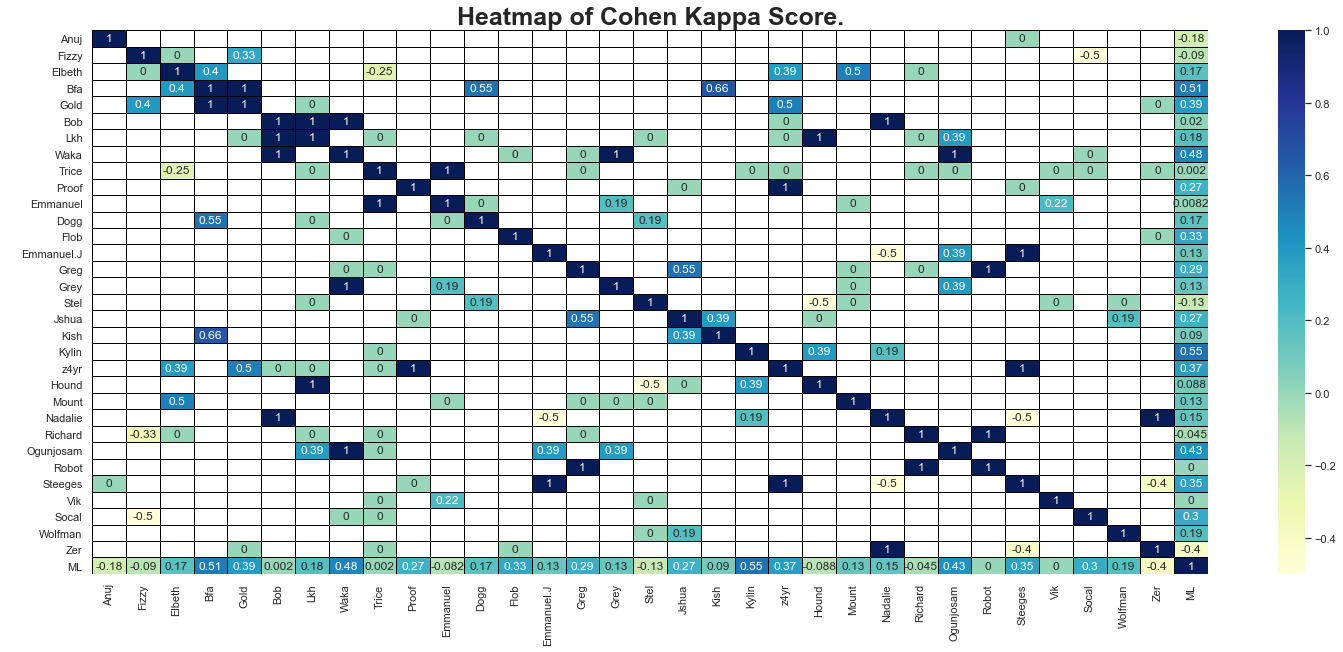

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
# You can change the values here to your taste.
plt.figure(figsize=(25,10))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
corr2.rename({"Unnamed: 0": " "}, axis=1, inplace=True)
sns.heatmap(corr2.set_index(" "), annot=True, cmap="YlGnBu", linecolor="black", linewidths=0.5)
plt.title("Heatmap of Cohen Kappa Score.", fontsize=25, weight="bold")
plt.savefig("heatmap_cohen_kapppa.png")
plt.show()


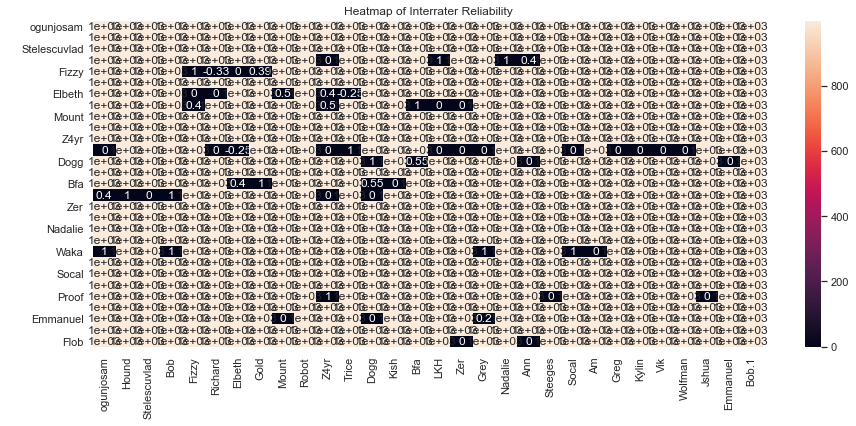

In [548]:
import seaborn as sns
import matplotlib.pyplot as plt
# You can change the values here to your taste.
plt.figure(figsize=(15,6))
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
corr.rename({"Unnamed: 0": " "}, axis=1, inplace=True)
sns.heatmap(corr.set_index(" "), annot=True)
plt.title("Heatmap of Interrater Reliability")
#plt.savefig("heatmap.png")
plt.show()


In [544]:
corr

,,ogunjosam,Hound,Stelescuvlad,Bob,Fizzy,Richard,Elbeth,Gold,Mount,...,Z4yr,Trice,Dogg,Kish,Bfa,LKH,Zer,Grey,Nadalie,Ann2
0,ogunjosam,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,Hound,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2,Stelescuvlad,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,Bob,-,-,-,-,-,-,-,-,-,...,0.0,-,-,-,-,1.0,-,-,1.0,0.4
4,Fizzy,-,-,-,-,1.0,-0.33,0.0,0.39,-,...,-,-,-,-,-,-,-,-,-,-
5,Richard,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
6,Elbeth,-,-,-,-,0.0,0.0,-,-,0.5,...,0.4,-0.25,-,-,-,-,-,-,-,-
7,Gold,-,-,-,-,0.4,-,-,-,-,...,0.5,-,-,-,1.0,0.0,0.0,-,-,-
8,Mount,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
9,Robot,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
